In [1]:
import random
import time
import matplotlib.pyplot as plt
from typing import List
from splay_tree import SplayTree, DeamortizedSplayTree 
import numpy as np
import math

# Splay Tree

- Inserción: $\mathcal{O}(\log N)$ (amortizado) $\mathcal{O}(N)$ (peor caso)
- Búsqueda: $\mathcal{O}(\log N)$ (amortizado) $\mathcal{O}(N)$ (peor caso)

## DeamortizedSplayTree
- La inserción se realiza con complejidad de $\mathcal{O}(\log N)$ en el peor caso, debido a que se limita el número de rotaciones en la operación splay por nodo. Se maneja una cola con los nodos pendientes de operar con splay

In [32]:
N=100
keys = list(random.sample(range(N), 10))
print(keys)

splay_tree = SplayTree[int, int]()
for i in keys:
    splay_tree.insert(SplayTree.Entry(i,i))
splay_tree.print_tree()

splay_tree.search(random.randint(1,N))
splay_tree.print_tree()

print("Tamaño del tree:", splay_tree.size())
print("Altura del tree:", splay_tree.height())
print("Tamaño luego de top:", splay_tree.size())

[78, 90, 83, 93, 55, 4, 9, 37, 18, 80]
`- L - (K: 80)
   |- L - (K: 18)
   |  |- L - (K: 9)
   |  |  `- L - (K: 4)
   |  `- R - (K: 37)
   |     `- R - (K: 55)
   |        `- R - (K: 78)
   `- R - (K: 93)
      `- L - (K: 83)
         `- R - (K: 90)
`- L - (K: 80)
   |- L - (K: 18)
   |  |- L - (K: 9)
   |  |  `- L - (K: 4)
   |  `- R - (K: 37)
   |     `- R - (K: 55)
   |        `- R - (K: 78)
   `- R - (K: 93)
      `- L - (K: 83)
         `- R - (K: 90)
Tamaño del tree: 10
Altura del tree: 5
Tamaño luego de top: 10


In [33]:
splay_tree = DeamortizedSplayTree[int, int]()
for i in keys:
    splay_tree.insert(SplayTree.Entry(i,i))
splay_tree.print_tree()

splay_tree.search(random.randint(1,N))
splay_tree.print_tree()

print("Tamaño del tree:", splay_tree.size())
print("Altura del tree:", splay_tree.height())
print("Tamaño luego de top:", splay_tree.size())

`- L - (K: 80)
   |- L - (K: 18)
   |  |- L - (K: 9)
   |  |  `- L - (K: 4)
   |  `- R - (K: 37)
   |     `- R - (K: 55)
   |        `- R - (K: 78)
   `- R - (K: 93)
      `- L - (K: 83)
         `- R - (K: 90)
`- L - (K: 80)
   |- L - (K: 18)
   |  |- L - (K: 9)
   |  |  `- L - (K: 4)
   |  `- R - (K: 37)
   |     `- R - (K: 55)
   |        `- R - (K: 78)
   `- R - (K: 93)
      `- L - (K: 83)
         `- R - (K: 90)
Tamaño del tree: 10
Altura del tree: 5
Tamaño luego de top: 10


In [ ]:
N = 5000
KEY_RANGE = (1, 500000)

import csv
import os

def benchmark_insert_and_search(folder, keys, search_keys, tree, label: str, height_interval=N // 100):
    """
    Mide el tiempo de insert y search, y registra alturas suavizando la curva generada 
    al promediar en ventanas de N//100
    """
    insert_times: List[float] = []
    search_times: List[float] = []
    heights: List[int] = []

    try:
        os.mkdir(folder)
    except FileExistsError:
        print(f"Directory '{folder}' already exists.")
    except PermissionError:
        print(f"Permission denied: Unable to create '{folder}'.")
    except Exception as e:
        print(f"An error occurred: {e}")

    for i, k in enumerate(keys):
        entry = SplayTree.Entry(k, k)
        start = time.perf_counter()
        tree.insert(entry)
        end = time.perf_counter()
        insert_times.append(end - start)

        if (i + 1) % height_interval == 0:
            heights.append(tree.height())

    for k in search_keys:
        start = time.perf_counter()
        tree.search(k)
        end = time.perf_counter()
        search_times.append(end - start)

    # Guardar en CSV
    filename = f"{folder}/{label}_benchmark.csv"
    with open(filename, mode='w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["Index", "InsertTime", "SearchTime"])
        for i in range(len(keys)):
            writer.writerow([
                i + 1,
                insert_times[i],
                search_times[i]
            ])

    # Alturas en otro archivo
    height_file = f"{folder}/{label}_heights.csv"
    with open(height_file, mode='w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["NodeCount", "Height"])
        for i, h in enumerate(heights):
            writer.writerow([(i + 1) * height_interval, h])



def benchmark_worst_case(folder, keys, tree_class, label: str):
    """
    Mide el tiempo de insert y search en el PEOR CASO (operaciones individuales), y registra alturas suavizando la curva generada 
    al promediar en ventanas de N//100
    Crea un arbol con entradas incrementales (sin splay) y se analiza la insercion del ultimo elemento
    Se busca una clave aleatoria dentro del arbol y se registra el tiempo
    """
    insert_times: List[float] = []
    search_times: List[float] = []

    try:
        os.mkdir(folder)
    except FileExistsError:
        print(f"Directory '{folder}' already exists.")
    except PermissionError:
        print(f"Permission denied: Unable to create '{folder}'.")
    except Exception as e:
        print(f"An error occurred: {e}")

    for size in range(1, len(keys) + 1):
        tree = tree_class()
        for k in keys[:size - 1]:
            entry = SplayTree.Entry(k, k)
            tree.insert(entry, splay=False)

        last_key = keys[size - 1]
        last_entry = SplayTree.Entry(last_key, last_key)
        start = time.perf_counter()
        tree.insert(last_entry)
        end = time.perf_counter()
        insert_times.append(end - start)

        #print(tree.num_elems)
        start = time.perf_counter()
        tree.search(random.randint(0, size))
        end = time.perf_counter()
        search_times.append(end - start)

    # Guardar en CSV
    filename = f"{folder}/{label}_worst_case.csv"
    with open(filename, mode='w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["TreeSize", "InsertTime", "SearchTime"])
        for i in range(len(keys)):
            writer.writerow([i + 1, insert_times[i], search_times[i]])


def plot_heights_from_csv(file1: str, label1: str, file2: str, label2: str):
    """
    Funcion auxiliar para plotear las alturas
    """
    def load_heights(filename):
        heights = []
        with open(filename, newline='') as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                heights.append(int(row["Height"]))
        return heights

    h1 = load_heights(file1)
    h2 = load_heights(file2)

    step = N // len(h1)
    x_vals = list(range(step, N + 1, step))
    logn = [math.log2(n) for n in x_vals]

    plt.figure(figsize=(10, 4))
    plt.plot(x_vals, h1, label=f"Altura ({label1})")
    plt.plot(x_vals, h2, label=f"Altura ({label2})")
    plt.plot(x_vals, logn, '--', label=r"$\log_2(n)$ (escalado)", alpha=0.6)

    plt.xlabel("Tamaño del árbol (número de nodos)")
    plt.ylabel("Altura del árbol")
    plt.title("Altura del árbol durante inserciones")
    plt.legend()
    plt.tight_layout()
    plt.show()

def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

def load_times_from_csv(filename):
    insert_times = []
    search_times = []

    with open(filename, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            insert_times.append(float(row["InsertTime"]))
            search_times.append(float(row["SearchTime"]))

    return insert_times, search_times

def plot_times_from_csv(file1: str, label1: str, file2: str, label2: str, window_size=N // 10):
    """ 
    Funcion auxiliar para plotear tiempos
    """
    def scale_theoretical(curve, reference):
        max_ref = max(reference)
        max_curve = max(curve)
        return [v * max_ref / max_curve for v in curve]

    insert1, search1 = load_times_from_csv(file1)
    insert2, search2 = load_times_from_csv(file2)

    insert1_avg = moving_average(insert1, window_size)
    insert2_avg = moving_average(insert2, window_size)
    search1_avg = moving_average(search1, window_size)
    search2_avg = moving_average(search2, window_size)

    x = np.arange(len(insert1_avg)) + window_size // 2

    logn = [math.log2(i) if i > 0 else 0 for i in x]
    loglogn = [math.log2(math.log2(i)) if i > 2 else 0 for i in x]
    nlogn = [i * math.log2(i) if i > 0 else 0 for i in x]

    avg_curve = [(a + b) / 2 for a, b in zip(insert1_avg, insert2_avg)]
    logn_scaled = scale_theoretical(logn, avg_curve)
    loglogn_scaled = scale_theoretical(loglogn, avg_curve)
    nlogn_scaled = scale_theoretical(nlogn, avg_curve)

    fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    axs[0].plot(x, insert1_avg, label=f'Insert Avg ({label1})', alpha=0.8)
    axs[0].plot(x, insert2_avg, label=f'Insert Avg ({label2})', alpha=0.8)
    axs[0].plot(x, logn_scaled, '--', label=r"$\log_2(n)$ (escalado)", alpha=0.5)
    axs[0].plot(x, loglogn_scaled, '--', label=r"$\log_2(\log_2(n))$ (escalado)", alpha=0.5)
    axs[0].plot(x, nlogn_scaled, '--', label=r"$n \log_2(n)$ (escalado)", alpha=0.5)
    axs[0].set_ylabel("Tiempo (s)")
    axs[0].set_title(f"Tiempos de inserción (promedio móvil, ventana={window_size})")
    axs[0].legend()
    axs[0].grid(True)

    axs[1].plot(x, search1_avg, label=f'Search Avg ({label1})', alpha=0.8)
    axs[1].plot(x, search2_avg, label=f'Search Avg ({label2})', alpha=0.8)
    axs[1].plot(x, logn_scaled, '--', label=r"$\log_2(n)$ (escalado)", alpha=0.5)
    axs[1].plot(x, loglogn_scaled, '--', label=r"$\log_2(\log_2(n))$ (escalado)", alpha=0.5)
    axs[1].plot(x, nlogn_scaled, '--', label=r"$n \log_2(n)$ (escalado)", alpha=0.5)
    axs[1].set_ylabel("Tiempo (s)")
    axs[1].set_xlabel("Operación")
    axs[1].set_title(f"Tiempos de búsqueda (promedio móvil, ventana={window_size})")
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

In [ ]:
def test_tree(caso,keys, search_keys):
    """ 
    Funcion auxiliar para probar ambos arboles en cada caso
    """
    if caso=="worst_case":
        # Ejecutar benchmarks y guardar en CSV
        print("Peor Caso: Splay Tree (Amortizado)...")
        benchmark_worst_case(caso,keys, SplayTree, "SplayTree")

        print("Peor Caso: Deamortized Splay Tree...")
        benchmark_worst_case(caso,keys, DeamortizedSplayTree, "Deamortized")
    else:
        # Ejecutar benchmarks y guardar en CSV
        print("Probando Splay Tree (Amortizado)...")
        splay = SplayTree[int, int]()
        benchmark_insert_and_search(caso,keys, search_keys, splay, "SplayTree")

        print("Probando Deamortized Splay Tree...")
        d_splay = DeamortizedSplayTree[int, int]()
        benchmark_insert_and_search(caso,keys, search_keys, d_splay, "Deamortized")
        
    # Leer CSVs y graficar tiempos
    plot_times_from_csv(
        file1=f"{caso}/SplayTree_benchmark.csv",
        label1="SplayTree",
        file2=f"{caso}/Deamortized_benchmark.csv",
        label2="Deamortized"
    )

    # Leer CSVs y graficar alturas
    plot_heights_from_csv(
        file1=f"{caso}/SplayTree_heights.csv",
        label1="SplayTree",
        file2=f"{caso}/Deamortized_heights.csv",
        label2="Deamortized"
    )

## Caso de claves incrementales

Se insertan una lista incremental de N claves para el caso amortizado y desamortizado

Se busca la misma lista en el mismo orden (peor caso)

Probando Splay Tree (Amortizado)...
Directory 'incremental_input' already exists.
Probando Deamortized Splay Tree...
Directory 'incremental_input' already exists.


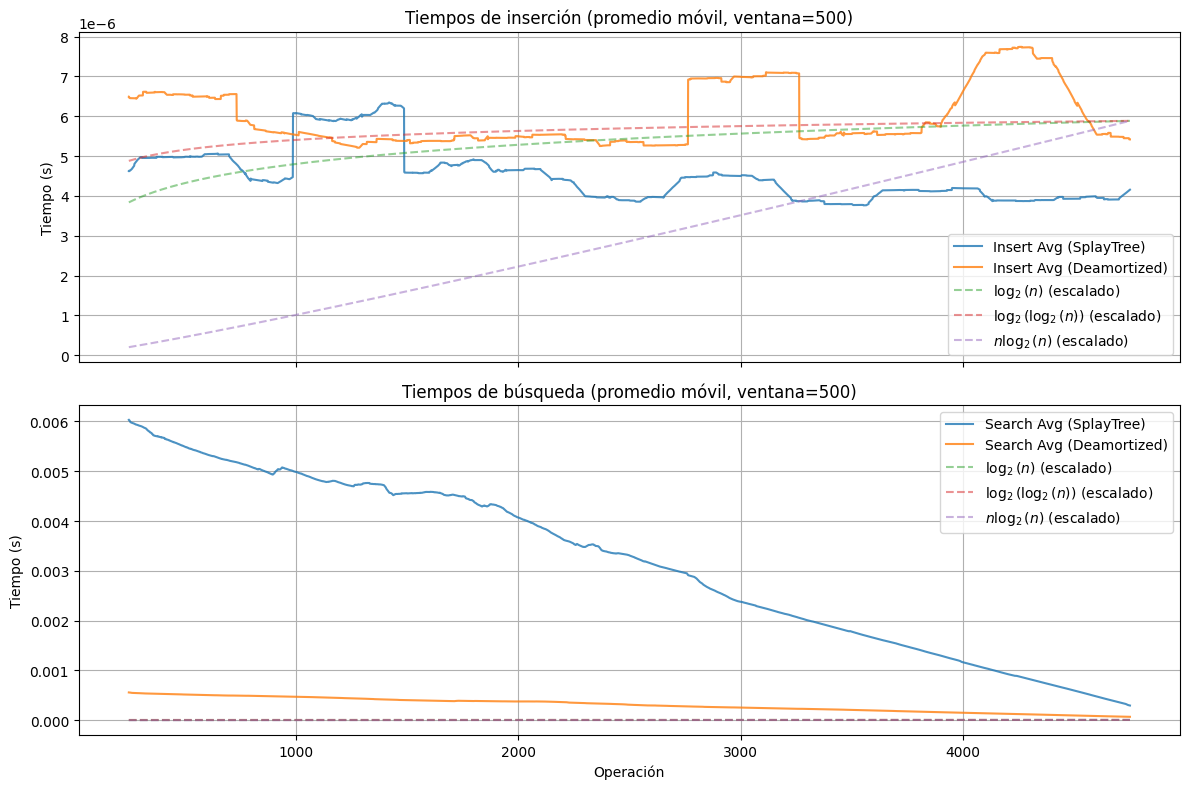

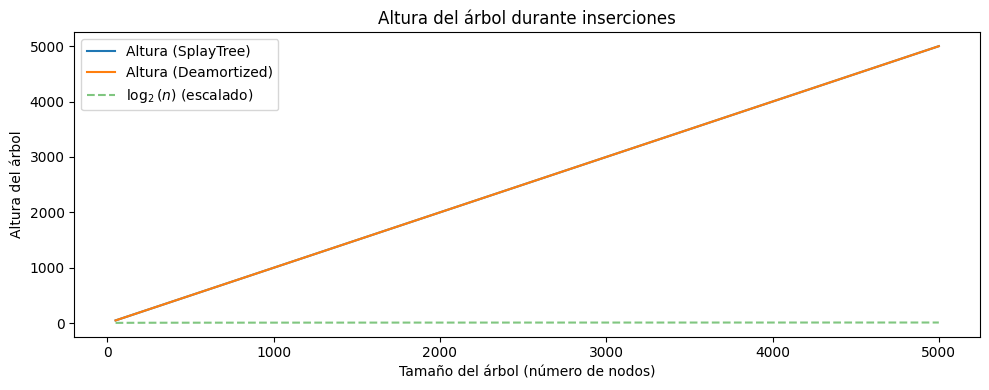

In [4]:
keys = list(range(N))
search_keys = keys

test_tree("incremental_input",keys, search_keys)


## Caso de inserciones aleatorias

Se insertan y se buscan claves aleatorias (caso general)

Probando Splay Tree (Amortizado)...
Directory 'random_input' already exists.
Probando Deamortized Splay Tree...
Directory 'random_input' already exists.


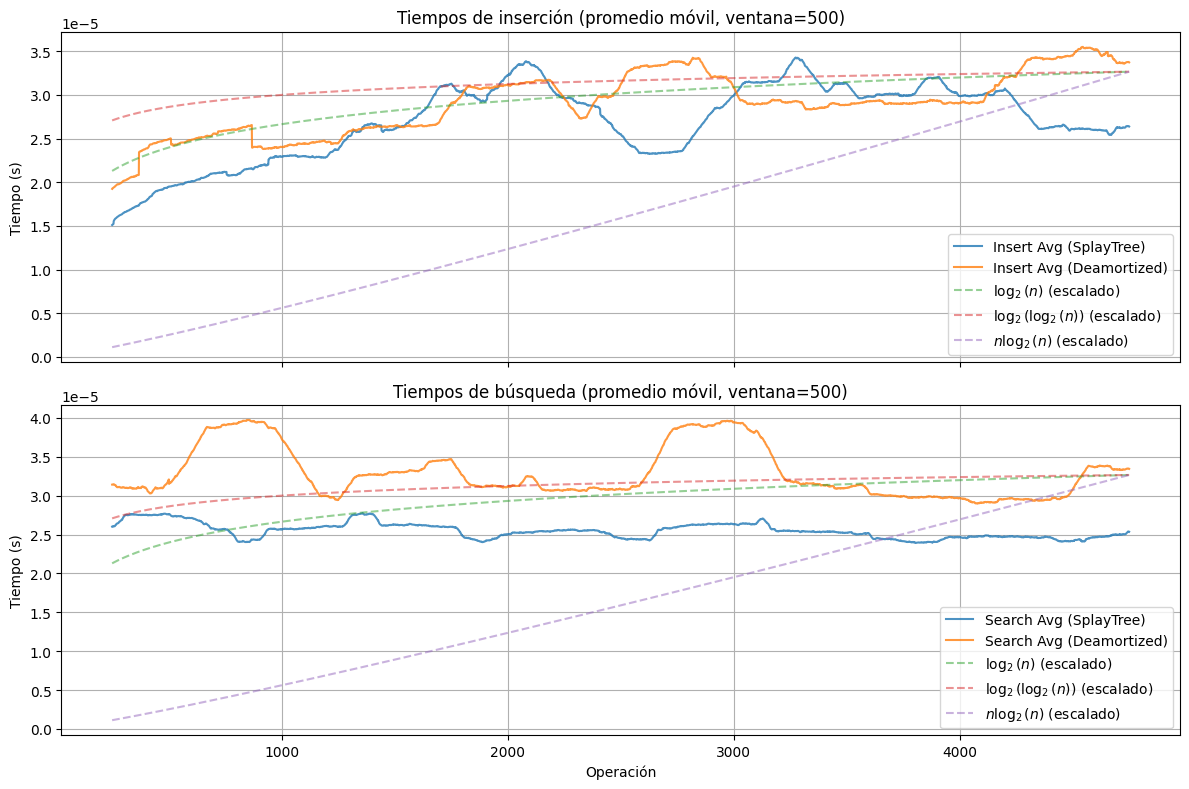

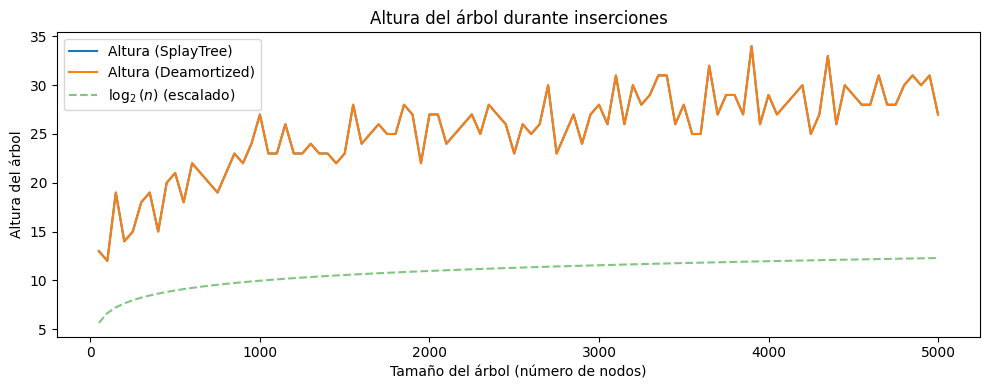

In [6]:
keys = list(random.sample(range(*KEY_RANGE), N))
search_keys = keys

test_tree("random_input",keys, search_keys)


## Peor Caso (arboles degenerados)

El peor caso involucra que se tenga una estructura definida de arbol degenerado en lista enlazada, en donde se insertarán N-1 claves y se medirá el tiempo de inserción para la clave N.

La búsqueda se realizará sobre una clave aleatoria en el arbol resultante

Peor Caso: Splay Tree (Amortizado)...
Directory 'worst_case' already exists.
Peor Caso: Deamortized Splay Tree...
Directory 'worst_case' already exists.


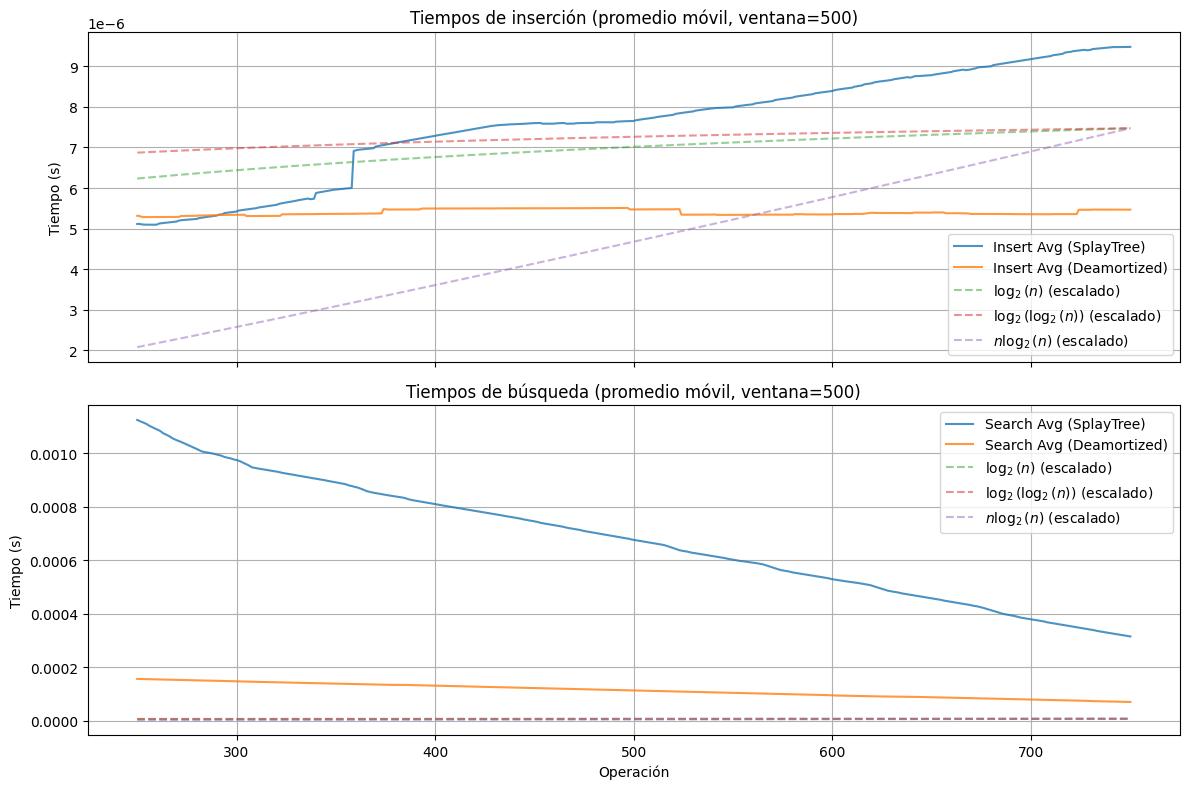

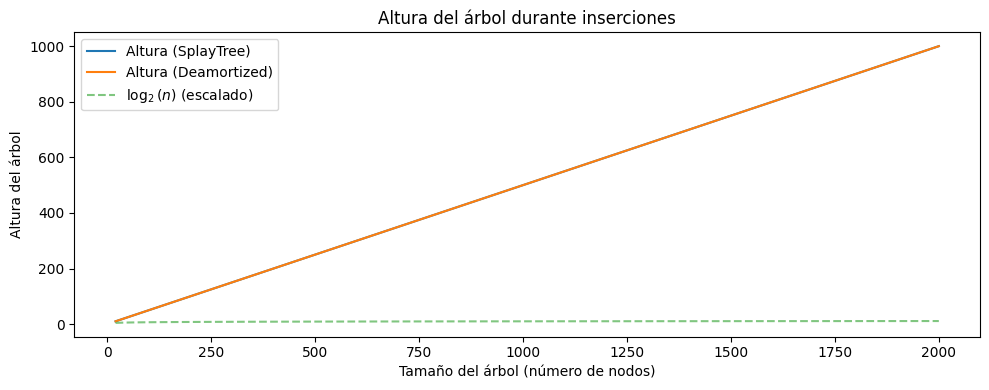

In [ ]:
N=2000
keys = list(range(N))
 
test_tree("worst_case", keys, keys)
